# Observations

#### The closer the city is to the equator (latitude 0), the hotter the city is. 
#### From the random sample, all the cities near the equator (between -5 and 5 latitude) have high humidity (higher than 50%).
#### Cities that have the highest wind speeds are found further away from the equator but there is no obvious relationship between latitude and wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#create lists 
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_speed = []
date = []
country = []
city_list = []

print("--------Beginning Data Retrieval--------")

for city in cities:
    query_url = url + "&q=" + city
    
    #parse out the information in json
    weather_json = requests.get(query_url).json()

    #wrap it in a try: except: in case there are missing info for some cities
    try:
        #append info to list 
        lat.append(weather_json["coord"]["lat"])
    except: 
        #if there is missing info, add a nan value
        lat.append(np.nan)
        
    try:
        lng.append(weather_json["coord"]["lon"])
    except:
        lng.append(np.nan)
        
    try:
        temp.append(weather_json["main"]["temp"])
    except:
        temp.append(np.nan)
        
    try:
        humidity.append(weather_json["main"]["humidity"])
    except:
        humidity.append(np.nan)
        
    try:
        clouds.append(weather_json["clouds"]["all"])
    except:
        clouds.append(np.nan)
        
    try:
        wind_speed.append(weather_json["wind"]["speed"])
    except:
        wind_speed.append(np.nan)
    
    try:
        date.append(weather_json["dt"])
    except:
        date.append(np.nan)
        
    try:
        country.append(weather_json["sys"]["country"])
    except:
        country.append(np.nan)
        
    try:
        city_list.append(weather_json["name"])
    except:
        city_list.append(np.nan)
    
    #print processing log
    try:
        city_name = weather_json["name"]
        city_id = weather_json["id"]

        print("Processing " + city_name + " | City ID: " + str(city_id))
        print(query_url)
    except KeyError: 
        print("Skipping.. no city information")

print("====================================================")
print("Data Retrieval Complete")
print("====================================================")

--------Beginning Data Retrieval--------
Processing Kapaa | City ID: 5848280
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kapaa
Skipping.. no city information
Processing Ribeira Grande | City ID: 3372707
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=ribeira grande
Processing Thompson | City ID: 6165406
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=thompson
Processing Necochea | City ID: 3430443
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=necochea
Processing Cape Town | City ID: 3369157
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cape town
Processing Hithadhoo | City ID: 1282256
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=hithadhoo
Processing R

Processing Arlit | City ID: 2447513
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=arlit
Processing Saint George | City ID: 262462
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=saint george
Skipping.. no city information
Processing Avarua | City ID: 4035715
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=avarua
Processing Komsomolskiy | City ID: 1486910
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=komsomolskiy
Processing Pisco | City ID: 3932145
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=pisco
Processing Chuy | City ID: 3443061
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=chuy
Processing Denpasar | City ID: 1645528
http://api.openweathermap.org/dat

Processing Putina | City ID: 3931275
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=putina
Processing Cherskiy | City ID: 2126199
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cherskiy
Processing Hofn | City ID: 2630299
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=hofn
Processing Pevek | City ID: 2122090
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=pevek
Skipping.. no city information
Processing Baykit | City ID: 1510689
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=baykit
Processing Pimenta Bueno | City ID: 3924908
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=pimenta bueno
Processing Tuktoyaktuk | City ID: 6170031
http://api.openweathermap.org/dat

Processing Severo-Kurilsk | City ID: 2121385
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=severo-kurilsk
Processing Akhisar | City ID: 324698
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=akhisar
Skipping.. no city information
Processing Nelson Bay | City ID: 2155562
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=nelson bay
Processing Asyut | City ID: 359783
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=asyut
Skipping.. no city information
Processing Hastings | City ID: 2190224
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=hastings
Processing Ulaanbaatar | City ID: 2028462
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=ulaanbaatar
Processing Gravelbou

Skipping.. no city information
Processing Berlevag | City ID: 780687
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=berlevag
Processing Obama | City ID: 1854849
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=obama
Processing Matara | City ID: 3948642
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=matara
Processing Lompoc | City ID: 5367788
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=lompoc
Processing Neuquen | City ID: 3843123
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=neuquen
Processing San Carlos | City ID: 3628503
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=san carlos
Processing Flin Flon | City ID: 5954718
http://api.openweathermap.org/data/2

Processing Mossendjo | City ID: 2256895
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=mossendjo
Processing Tefe | City ID: 3661944
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=tefe
Processing Mbandaka | City ID: 2312895
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=mbandaka
Processing Soyo | City ID: 2236967
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=soyo
Processing Longyearbyen | City ID: 2729907
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=longyearbyen
Processing Pangnirtung | City ID: 6096551
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=pangnirtung
Processing Lerwick | City ID: 2644605
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Viedma | City ID: 3832899
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=viedma
Processing Dongying | City ID: 1812101
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=dongying
Processing Bubaque | City ID: 2374583
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=bubaque
Processing Quatre Cocos | City ID: 1106643
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=quatre cocos
Processing Nemuro | City ID: 2128975
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=nemuro
Processing Marsh Harbour | City ID: 3571913
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=marsh harbour
Processing Aklavik | City ID: 5882953
http://api.openweathermap.org/data/2.5/weather?u

Processing Road Town | City ID: 3577430
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=road town
Processing Cape Coast | City ID: 2302357
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cape coast
Processing Port Shepstone | City ID: 964406
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=port shepstone
Processing Gorontalo | City ID: 1643837
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=gorontalo
Processing Fukue | City ID: 1848373
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=fukue
Processing Siuri | City ID: 1255955
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=siuri
Processing Nouadhibou | City ID: 2377457
http://api.openweathermap.org/data/2.5/weather

Processing Cayenne | City ID: 3382160
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cayenne
Processing Yumen | City ID: 1528998
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=yumen
Processing Asind | City ID: 1278278
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=asind
Processing Bukene | City ID: 160971
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=bukene
Processing Nishihara | City ID: 1850144
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=nishihara
Processing Kempsey | City ID: 2161658
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kempsey
Processing Ornskoldsvik | City ID: 2686469
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d

Processing Bacolod | City ID: 1729564
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=bacolod
Processing Murgab | City ID: 1218612
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=murgab
Processing Ha Tinh | City ID: 1581047
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=ha tinh
Processing Auce | City ID: 461336
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=auce
Processing Qazigund | City ID: 1259102
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=qazigund
Processing Lagoa | City ID: 2267254
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=lagoa
Processing Codrington | City ID: 2160063
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e1

Processing Tres Arroyos | City ID: 3833859
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=tres arroyos
Processing Kindu | City ID: 212902
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kindu
Processing Cockburn Town | City ID: 3576994
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cockburn town
Processing Hare Bay | City ID: 5970873
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=hare bay
Processing Half Moon Bay | City ID: 5354943
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=half moon bay
Processing Rivers | City ID: 6122707
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=rivers
Processing Baraki Barak | City ID: 1147066
http://api.openweathermap.org/data

In [4]:
#print it out to see where the required info is located
#print(json.dumps(weather_json,indent=4))

In [5]:
#build data frame
weather_df = pd.DataFrame()
weather_df["City"] = city_list
weather_df["Country"] = country
weather_df["Date"] = date
weather_df["Latitude"] = lat
weather_df["Longitude"] = lng
weather_df["Temperature"] = temp
weather_df["Humidity"] = humidity
weather_df["Cloudiness"] = clouds
weather_df["Wind Speed"] = wind_speed
weather_df.head()


,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,1.535583e+09,22.08,-159.32,83.53,77.0,40.0,16.11
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ribeira Grande,PT,1.535586e+09,38.52,-28.70,76.21,97.0,88.0,16.15
3,Thompson,CA,1.535584e+09,55.74,-97.86,59.00,54.0,75.0,8.05
4,Necochea,AR,1.535586e+09,-38.55,-58.74,50.47,81.0,0.0,10.11


In [6]:
#drop nan values in data frame (axis=0 --> dropping rows) (how="any" --> drop the whole row if there is a nan value)
cleaned_weather_df = weather_df.dropna(axis=0,how="any")

#reset index
cleaned_weather_df = cleaned_weather_df.reset_index()

#drop "index" column created while resetting index
new_weather_df = cleaned_weather_df[["City", 
                                     "Country", 
                                     "Date", 
                                     "Latitude", 
                                     "Longitude",
                                     "Temperature", 
                                     "Humidity", 
                                     "Cloudiness", 
                                     "Wind Speed"]]

#format so that date is not displayed in scientific form
pd.options.display.float_format = '{:.2f}'.format

#save to csv
new_weather_df.to_csv("../output_data/cities.csv")

#visualize data frame 
new_weather_df.head(10)

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,1535583360.00,22.08,-159.32,83.53,77.00,40.00,16.11
1,Ribeira Grande,PT,1535586020.00,38.52,-28.70,76.21,97.00,88.00,16.15
2,Thompson,CA,1535583600.00,55.74,-97.86,59.00,54.00,75.00,8.05
3,Necochea,AR,1535586311.00,-38.55,-58.74,50.47,81.00,0.00,10.11
4,Cape Town,ZA,1535583600.00,-33.93,18.42,53.60,93.00,0.00,8.05
5,Hithadhoo,MV,1535586007.00,-0.60,73.08,83.05,100.00,64.00,7.65
6,Rikitea,PF,1535586127.00,-23.12,-134.97,75.22,96.00,0.00,16.49
7,Hilo,US,1535583360.00,19.71,-155.08,74.84,69.00,75.00,9.17
8,Busselton,AU,1535586119.00,-33.64,115.35,56.95,100.00,76.00,21.63
9,Grand Gaube,MU,1535583600.00,-20.01,57.66,64.40,77.00,20.00,12.46


In [7]:
#convert unix timestamp to date
date = time.ctime(new_weather_df["Date"][0])
#print(date)

#set variables for plot attributes 
color = "salmon"
edgecolor = "black"
alpha = 1

Wed Aug 29 15:56:00 2018


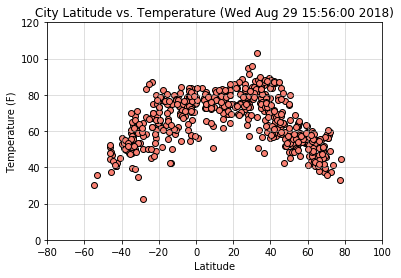

In [8]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Temperature"], 
    facecolor=color,
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(0,120)
plt.xlim(-80,100)
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(alpha=0.5)

#save plot to fig
plt.savefig("../Images/temperature.png")

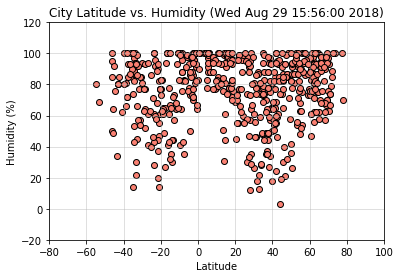

In [9]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Humidity"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(alpha=0.5)
plt.savefig("../Images/humidity.png")

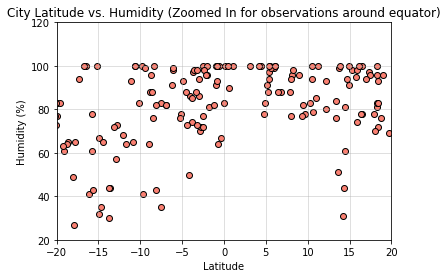

In [10]:
#zooming into part of the plot for observations
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Humidity"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(20,120)
plt.xlim(-20,20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (Zoomed In for observations around equator)")
plt.grid(alpha=0.5)

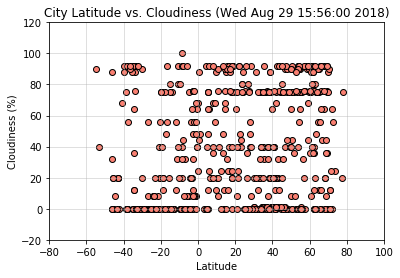

In [11]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Cloudiness"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(alpha=0.5)
plt.savefig("../Images/cloudiness.png")

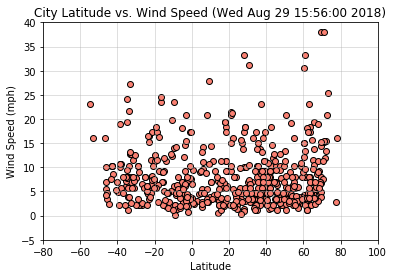

In [12]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Wind Speed"],
    facecolor=color,
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(alpha=0.5)
plt.savefig("../Images/windspeed.png")